In [2]:
%pip install wordcloud


  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
# notebooks/visualize.ipynb (Python script version of the notebook)

import sys
sys.path.append('..')  # Add parent folder to import from scripts

from scripts.visualize import (
    plot_channel_distribution,
    plot_gantt_chart,
    generate_hist_box_plots,
    plot_word_cloud,
    plot_top_tokens,
    plot_label_distribution,
)

import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
try:
    df = pd.read_csv('../data/preprocessed_data.csv')
except FileNotFoundError:
    raise FileNotFoundError("Ensure '../data/tokenized_data.csv' exists.")

# Rename if needed for consistency with visualization functions
if 'channel' in df.columns and 'channel_address' not in df.columns:
    df = df.rename(columns={'channel': 'channel_address'})

if 'timestamp' in df.columns and 'date' not in df.columns:
    df = df.rename(columns={'timestamp': 'date'})

# Plot 1: Channel Distribution
try:
    plot_channel_distribution(df)
except KeyError as e:
    print(f"Skipping channel distribution plot: {e}")

# Plot 2: Gantt Chart
try:
    plot_gantt_chart(df)
except KeyError as e:
    print(f"Skipping Gantt chart: {e}")

# Plot 3: Histograms and Boxplots
plot_data = []
if 'message_length' in df.columns:
    plot_data.append({"title": "Length Distribution", "column": "message_length", "label": "Length"})
if 'response_time' in df.columns:
    plot_data.append({"title": "Response Time", "column": "response_time", "label": "Time (seconds)"})

if plot_data:
    try:
        generate_hist_box_plots(df, plot_data)
    except KeyError as e:
        print(f"Skipping hist/box plots: {e}")
else:
    print("Skipping hist/box plots: No valid columns found.")

# Plot 4: Word Cloud
try:
    plot_word_cloud(df, language='amharic')
except KeyError as e:
    print(f"Skipping word cloud: {e}")

# Plot 5: Top Tokens
try:
    plot_top_tokens(df, top_n=20)
except KeyError as e:
    print(f"Skipping top tokens plot: {e}")

# Plot 6: Label Distribution
try:
    plot_label_distribution(df)
except KeyError as e:
    print(f"Skipping label distribution: {e}")

# Show any remaining figures
plt.show()


Skipping channel distribution plot: 'channel_address'
Skipping Gantt chart: 'channel_address'
Skipping hist/box plots: No valid columns found.
Skipping word cloud: 'cleaned_message'
Skipping top tokens plot: 'token'
Skipping label distribution: 'label'


In [24]:
%matplotlib inline

import sys
sys.path.append('..')

from scripts.visualize import (
    plot_channel_distribution,
    plot_gantt_chart,
    generate_hist_box_plots,
    plot_word_cloud,
    plot_top_tokens,
    plot_label_distribution,
)

import pandas as pd

# Load your data
# df = pd.read_csv('your_data.csv')

# Example call:
# plot_channel_distribution(df)


Available columns: ['Unnamed: 0', 'cleaned_text', 'tokenize']


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

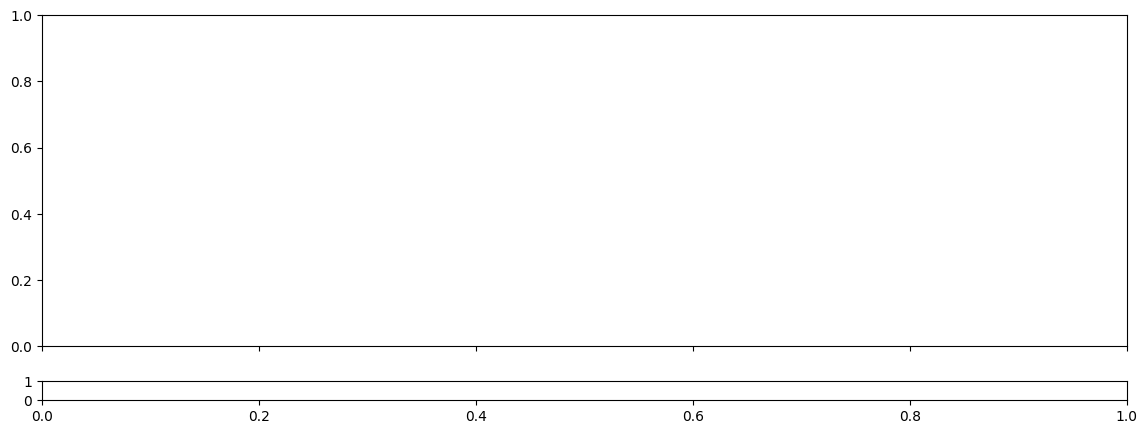

In [18]:
%matplotlib inline

import sys
sys.path.append('..')  # Add parent dir to access scripts

import pandas as pd

from scripts.visualize import (
    plot_channel_distribution,
    plot_gantt_chart,
    generate_hist_box_plots,
    plot_word_cloud,
    plot_top_tokens,
    plot_label_distribution,
)

# Load the dataset
df = pd.read_csv('../data/tokenized_data.csv')  # adjust path if needed

# Inspect available columns to avoid KeyErrors
print("Available columns:", df.columns.tolist())

# No need to rename columns since 'channel' and 'timestamp' do not exist in this df

# Only call plot functions that use available columns
# plot_channel_distribution(df)  # Skipped: requires 'channel_address' column

# plot_gantt_chart(df)  # Skipped: requires 'date' column

# Add 'message_length' column based on the number of tokens in each row
df['message_length'] = df['tokenize'].apply(len)

# Histogram and boxplot configuration
plot_data = [
    {"title": "Length Distribution", "column": "message_length", "label": "Length"},
    # {"title": "Response Time", "column": "response_time", "label": "Time (seconds)"},  # Removed because column does not exist
]
generate_hist_box_plots(df, plot_data)

# Flatten the list of tokens for word cloud and top tokens
all_tokens = [token for sublist in df['tokenize'] for token in sublist]

# Generate Amharic word cloud
plot_word_cloud(all_tokens, language='amharic')

# Plot top tokens (adjust font path inside scripts/visualize.py if needed)
plot_top_tokens(all_tokens, top_n=20)

# Plot label distribution
plot_label_distribution(df)
